<img src="https://media-exp1.licdn.com/dms/image/C4E1BAQEKOIsF4fUeLg/company-background_10000/0?e=2159024400&v=beta&t=URpnngW1v84s3H7co4-iXZ2OsbUZUcdY8pVemsQZ-3g"/>

**Let's get started!**

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
%autosave 10

Autosaving every 10 seconds


## Get the data

In [4]:
data=pd.read_csv('cleaned_data.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [5]:
data[['LIMIT_BAL']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 1 columns):
LIMIT_BAL    26664 non-null int64
dtypes: int64(1)
memory usage: 208.4 KB


In [6]:
data[['default payment next month']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 1 columns):
default payment next month    26664 non-null int64
dtypes: int64(1)
memory usage: 208.4 KB


In [7]:
data['default payment next month'].value_counts()

0    20750
1     5914
Name: default payment next month, dtype: int64

In [8]:
data['default payment next month'].mean()

0.2217971797179718

It is an unbalanced dataset and contain more nuber of 0's than 1's and 22% of the samples are positive.

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [9]:
X=data['LIMIT_BAL']
y=data['default payment next month']

## Splitting the Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1),y.values ,test_size=0.2, random_state=24)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


## Creating and Training the Model

In [13]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [14]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [15]:
predictions=model.predict(X_test)

In [16]:
predicted_probabilities=model.predict_proba(X_test)
predicted_probabilities

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [18]:
print(accuracy_score(y_test, predictions))

0.7834239639977498


In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4178
           1       0.00      0.00      0.00      1155

    accuracy                           0.78      5333
   macro avg       0.39      0.50      0.44      5333
weighted avg       0.61      0.78      0.69      5333



In [20]:
print(confusion_matrix(y_test, predictions))

[[4178    0]
 [1155    0]]


We get around 78% accuracy but the model is useless because it predicts only negative values(0's)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [21]:
from sklearn import metrics

In [22]:
metrics.roc_auc_score(y_test,predicted_probabilities[:,1])

0.6201990844642832

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

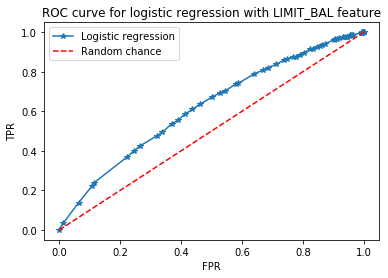

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,predicted_probabilities[:,1])
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

### Area Under the Curve

In [24]:
metrics.roc_auc_score(y_test,predicted_probabilities[:,1])

0.6201990844642832

By determining the Area under the curve (AUC) of a ROC curve, you can determine how good the model is. If the ROC curve is more towards the upper-left corner of the graph, it means that the model is very good and if it is more towards the 45-degree diagonal, it means that the model is almost completely random. So, the larger the AUC, the better will be your model. So the least area that an ROC curve can have is 0.5, and the highest area it can have is 1.

### Coparision with EDUCATION feature

In [25]:
E_X=data['EDUCATION']
E_y=data['default payment next month']

In [26]:
EX_train, EX_test, Ey_train, Ey_test = train_test_split(E_X.values.reshape(-1,1),E_y.values ,test_size=0.2, random_state=24)

In [27]:
print(EX_train.shape)
print(EX_test.shape)
print(Ey_train.shape)
print(Ey_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [28]:
model.fit(EX_train,Ey_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
E_predictions=model.predict(EX_test)

In [30]:
E_predicted_probabilities=model.predict_proba(EX_test)
E_predicted_probabilities

array([[0.77456295, 0.22543705],
       [0.77456295, 0.22543705],
       [0.79016179, 0.20983821],
       ...,
       [0.79016179, 0.20983821],
       [0.79016179, 0.20983821],
       [0.79016179, 0.20983821]])

In [31]:
print(accuracy_score(Ey_test, E_predictions))

0.7834239639977498


In [32]:
print(classification_report(Ey_test, E_predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4178
           1       0.00      0.00      0.00      1155

    accuracy                           0.78      5333
   macro avg       0.39      0.50      0.44      5333
weighted avg       0.61      0.78      0.69      5333



Text(0.5, 1.0, 'ROC curve for logistic regression with EDUCATION feature')

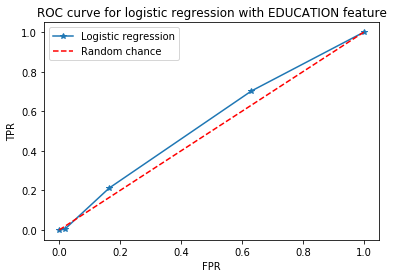

In [33]:
efpr, etpr, ethresholds = metrics.roc_curve(Ey_test, E_predicted_probabilities[:,1])
plt.plot(efpr, etpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with EDUCATION feature')

In [34]:
#AREA UNDER THE CURVE OF EDUCATION
metrics.roc_auc_score(Ey_test, E_predicted_probabilities[:,1])

0.5434650477972642

 The ROC AUC value of EDUCATION is less than LIMIT_BAL.

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [35]:
from sklearn.metrics import precision_score,recall_score

In [36]:
precision_score(y_test, predictions)

0.0

In [37]:
recall_score(y_test, predictions)

0.0

In [38]:
from sklearn.metrics import precision_recall_curve

In [39]:
precision, recall, prthresh = metrics.precision_recall_curve(y_test, predicted_probabilities[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


In [40]:
from sklearn.metrics import auc

(0, 1)

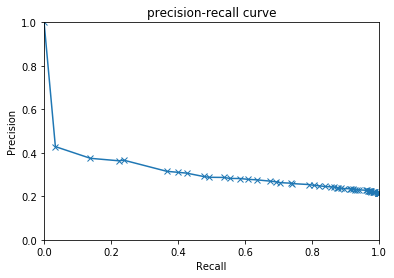

In [41]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('precision-recall curve')
plt.xlim([0,1])
plt.ylim([0,1])

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [42]:
print('Area under the precision-recall curve:',auc(recall,precision))

Area under the precision-recall curve: 0.31566964427378624


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [43]:
train_predicted_probabilities = model.predict_proba(X_train)
train_predicted_probabilities

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [44]:
metrics.roc_auc_score(y_train, train_predicted_probabilities[:,1])

0.5

    How is this different, conceptually and quantitatively, from your earlier calculation?


For training data the ROC AUC is lesser than testing data.